In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# revenue = '/content/drive/MyDrive/applerevenue.csv'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [8]:
revenue_data = pd.read_csv('applerevenue.csv')

In [9]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [10]:
revenue_data.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [11]:
revenue_data.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64

In [12]:
revenue_data.head()

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


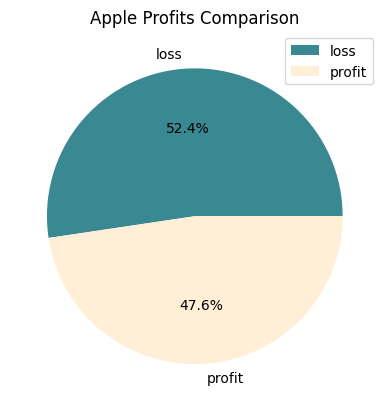

In [13]:
classes = revenue_data['profit or not'].value_counts().to_dict()

colors = ["#3A8891", '#FFEFD6']
labels = list(classes.keys())
values = list(classes.values())

plt.pie(values, labels=['loss', 'profit'], colors=colors, autopct="%.1f%%")
plt.title('Apple Profits Comparison')
plt.legend()
plt.show()

In [14]:
revenue_data['date'] = pd.to_datetime(revenue_data.date)

C:\Users\hp\AppData\Local\Temp\ipykernel_3964\1554761469.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  revenue_data['date'] = pd.to_datetime(revenue_data.date)


In [15]:
revenue_data['year'] = pd.DatetimeIndex(revenue_data.date).year
revenue_data['month'] = pd.DatetimeIndex(revenue_data.date).month

Text(0.5, 1.0, 'Graphs of Mean of Final Values per year')

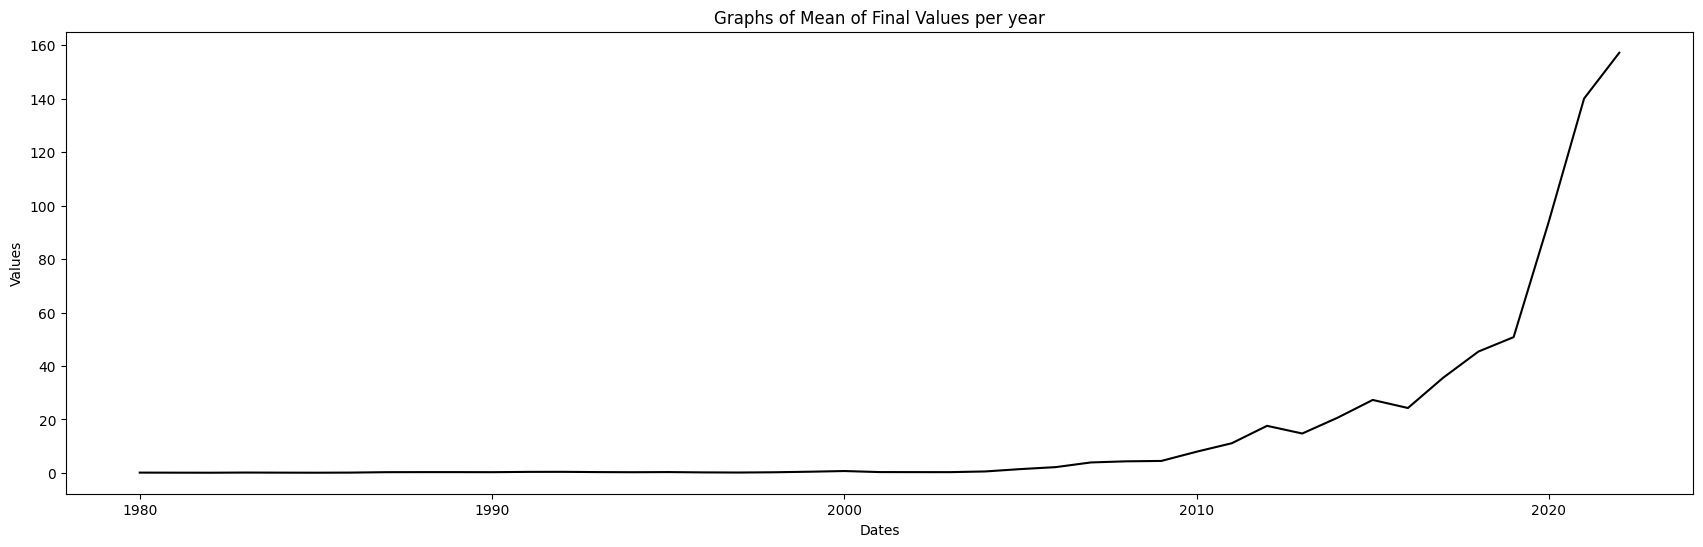

In [16]:
apple_data= pd.DataFrame(revenue_data.groupby('year')['close'].mean())
apple_data.reset_index(inplace=True)
plt.figure(figsize=(21,6))
plt.plot(apple_data['year'],apple_data['close'],color='black')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Graphs of Mean of Final Values per year')

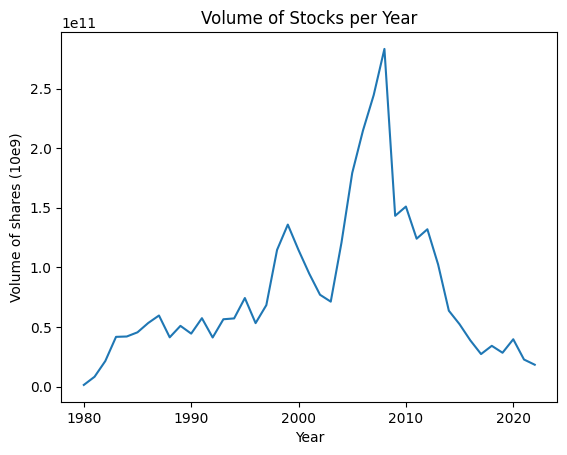

In [17]:
revenue_data.groupby('year')['volume'].sum().plot()
plt.title('Volume of Stocks per Year')
plt.xlabel('Year')
plt.ylabel('Volume of shares (10e9)')
plt.show()

In [18]:
revenue_data['Daily_Revenue'] = (revenue_data['close'] ) * revenue_data['volume']

# Assuming 'X' contains your features and 'y' contains your target variable (Daily Revenue)
X = revenue_data[['open', 'close', 'high', 'volume', 'profit or not']]
y = revenue_data['Daily_Revenue']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
revenue_data

,date,open,high,low,close,volume,profit or not,year,month,Daily_Revenue
0,1980-12-12,0.1003,0.1007,0.1003,0.1003,469033600,0,1980,12,4.704407e+07
1,1980-12-15,0.0955,0.0955,0.0951,0.0951,175884800,1,1980,12,1.672664e+07
2,1980-12-16,0.0885,0.0885,0.0881,0.0881,105728000,1,1980,12,9.314637e+06
3,1980-12-17,0.0902,0.0907,0.0902,0.0902,86441600,0,1980,12,7.797032e+06
4,1980-12-18,0.0929,0.0933,0.0929,0.0929,73449600,0,1980,12,6.823468e+06
...,...,...,...,...,...,...,...,...,...,...
10554,2022-10-24,147.1850,150.2300,146.0000,149.4500,75569074,0,2022,10,1.129380e+10
10555,2022-10-25,150.0900,152.4900,149.3600,152.3400,73583421,0,2022,10,1.120970e+10
10556,2022-10-26,150.9600,151.9900,148.0400,149.3500,87769611,1,2022,10,1.310839e+10
10557,2022-10-27,148.0700,149.0460,144.1300,144.8000,108110875,1,2022,10,1.565445e+10


In [20]:
revenue_data.set_index('date', inplace=True)

In [21]:
revenue_data = revenue_data[revenue_data['year'] >= 2004]

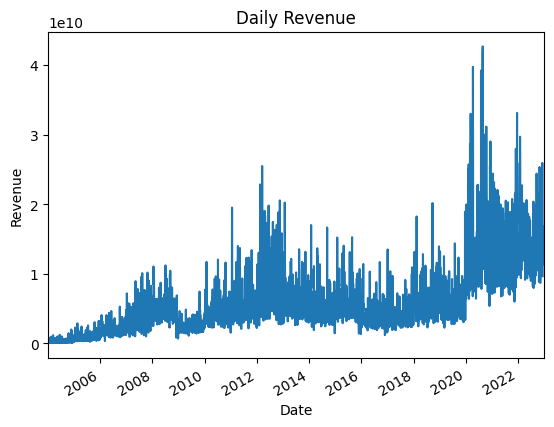

In [22]:

revenue_data['Daily_Revenue'].plot()
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xlim(revenue_data.index.min(), pd.Timestamp('2022-12-31'))
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3964\389693772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data['30D_MA'] = revenue_data['Daily_Revenue'].rolling(window=30).mean()


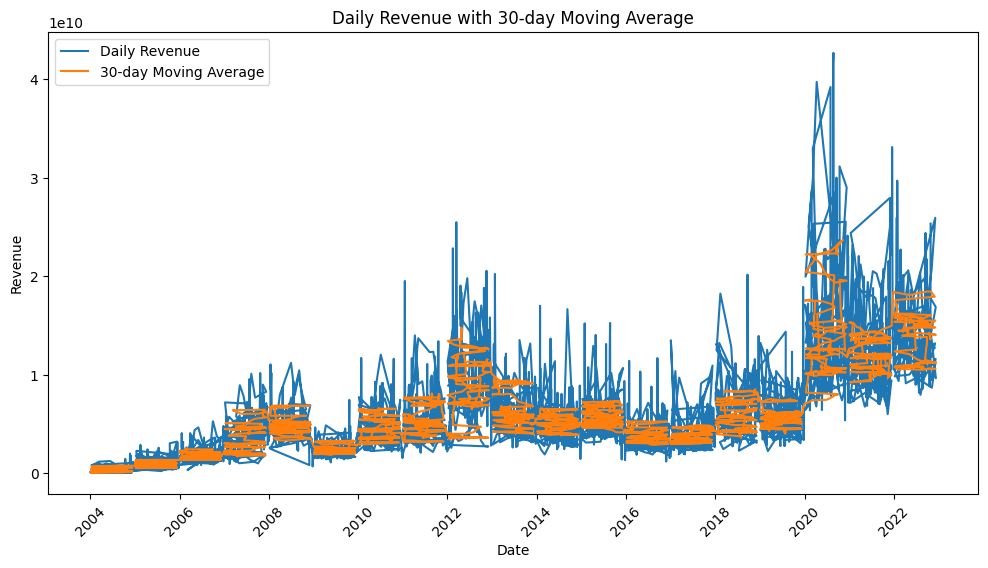

In [23]:


# Calculate the 30-day moving average
revenue_data['30D_MA'] = revenue_data['Daily_Revenue'].rolling(window=30).mean()

# Plot the daily revenue and moving average
plt.figure(figsize=(12, 6))
plt.plot(revenue_data.index, revenue_data['Daily_Revenue'], label='Daily Revenue')
plt.plot(revenue_data.index, revenue_data['30D_MA'], label='30-day Moving Average')
plt.title('Daily Revenue with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3964\2483045139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data[col_name] = revenue_data['Daily_Revenue'].rolling(window=ma).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_3964\2483045139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data[col_name] = revenue_data['Daily_Revenue'].rolling(window=ma).mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_3964\2483045139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

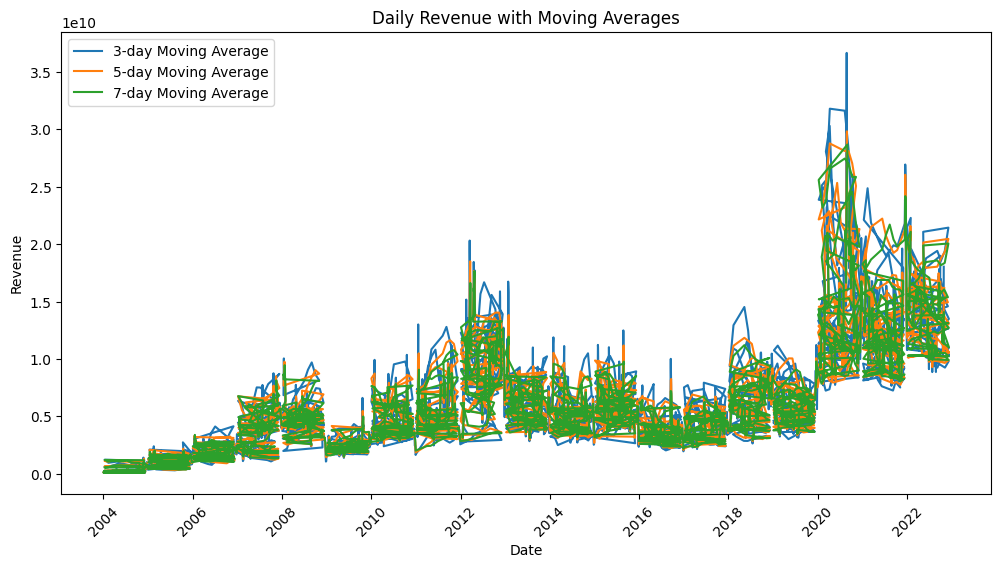

In [24]:
moving_averages = [3,5,7]
for ma in moving_averages:
    col_name = f'{ma}D_MA'
    revenue_data[col_name] = revenue_data['Daily_Revenue'].rolling(window=ma).mean()

# Plot the daily revenue and moving averages
plt.figure(figsize=(12, 6))
# plt.plot(revenue_data.index, revenue_data['Daily_Revenue'], label='Daily Revenue')
for ma in moving_averages:
    col_name = f'{ma}D_MA'
    plt.plot(revenue_data.index, revenue_data[col_name], label=f'{ma}-day Moving Average')

plt.title('Daily Revenue with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [25]:
yearly_revenue = revenue_data.groupby('year')['Daily_Revenue'].sum()

# Create a DataFrame with features for prediction
X = pd.DataFrame({
    'close': revenue_data.groupby('year')['close'].mean(),
    'open': revenue_data.groupby('year')['open'].mean(),
    'low' : revenue_data.groupby('year')['low'].mean(),
    'high' : revenue_data.groupby('year')['high'].mean(),
    'volume': revenue_data.groupby('year')['volume'].sum()
})

In [26]:
X

,close,open,low,high,volume
year,,,,,
2004,0.541615,0.539839,0.532433,0.549276,120759998494
2005,1.423170,1.421869,1.401380,1.442296,179193388282
2006,2.159078,2.164890,2.128546,2.193845,214765019788
2007,3.911139,3.914661,3.847419,3.966727,244551768235
2008,4.328998,4.338452,4.233826,4.425039,283305230470
2009,4.476462,4.470732,4.419783,4.527693,143253686800
2010,7.922703,7.925898,7.831388,7.999729,151024927200
2011,11.098638,11.100625,10.985621,11.202889,124059339600
2012,17.606879,17.625342,17.418366,17.783496,131964204400


In [27]:
y  = yearly_revenue

In [28]:
y

year
2004    7.365560e+10
2005    2.501279e+11
2006    4.611147e+11
2007    9.769241e+11
2008    1.184346e+12
2009    6.109037e+11
2010    1.174046e+12
2011    1.381536e+12
2012    2.329198e+12
2013    1.496085e+12
2014    1.276154e+12
2015    1.418119e+12
2016    9.306973e+11
2017    9.698705e+11
2018    1.535210e+12
2019    1.421044e+12
2020    3.618502e+12
2021    3.165506e+12
2022    2.864934e+12
Name: Daily_Revenue, dtype: float64

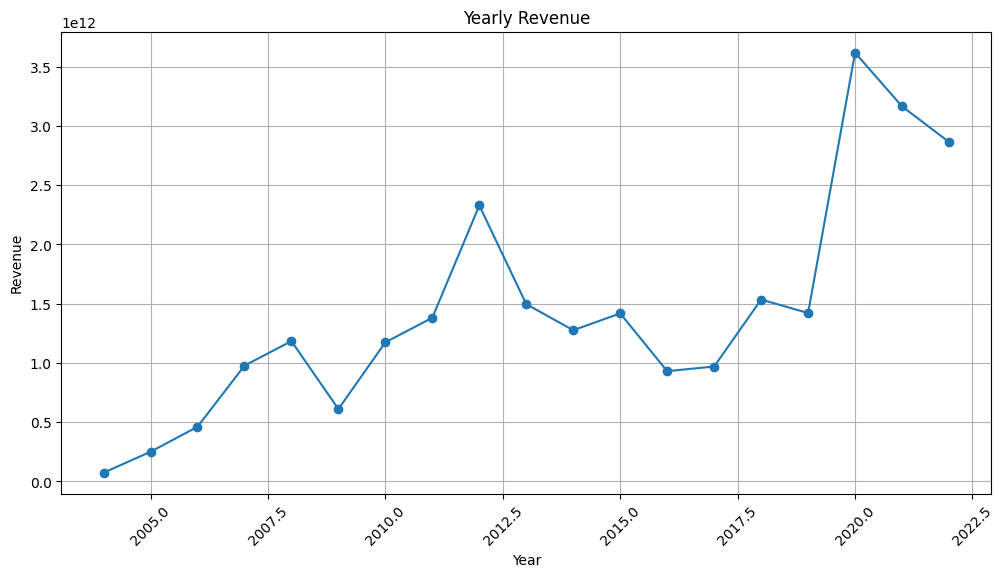

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
!pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 655.4 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/614.7 kB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.8 MB 5.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.8 MB 5.7 MB/s eta 0:00:01
   ----

In [34]:
from pmdarima import auto_arima

In [35]:
model = auto_arima(yearly_revenue, seasonal=True)  # Assuming monthly seasonality

# Make predictions
y_pred = model.predict(len(y_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5.450594511290167e+24


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
close_model = auto_arima(X_train['close'])
c = close_model.fit(X_train['close'])

# Make predictions for close price
close_pred = close_model.predict(len(X_test))

# Fit auto_arima model for volume
volume_model = auto_arima(X_train['volume'])
v = volume_model.fit(X_train['volume'])

# Make predictions for volume
volume_pred = volume_model.predict(len(X_test))

# Calculate revenue predictions
revenue_pred = close_pred * volume_pred






C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

In [37]:
close_pred = close_model.predict(3)
volume_pred = volume_model.predict(3)

# Calculate revenue predictions
revenue_pred = close_pred * volume_pred

print(revenue_pred)

15    6.027550e+12
16    4.372550e+12
17    4.372550e+12
dtype: float64


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

In [ ]:
years = [2023, 2024, 2025]
data = {'Year': years, 'Revenue Prediction': revenue_pred}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('revenue_predictions.csv', index=False)